### Constants

Relevant constants grabbed from here and there. Sources listed above values

In [143]:
import math

In [144]:
# https://arxiv.org/pdf/1904.10000
N_0 = (2**(7/2))/(3*math.sqrt(math.pi))
Omega_m = 0.1199
Omega_b = 0.0222
Omega_rad = 10e-4

# http://pdg.lbl.gov/2014/reviews/rpp2014-rev-astrophysical-constants.pdf
p_crit = 2.77536627e11
h = 0.6727
T_0 = 2.7255

# https://arxiv.org/pdf/1502.01589.pdf
Y_p = 0.25
m_p = 0.93827231 #GeV
H_0 = 67.3

# T_b = 
# T_x = 
# p_b = # How does this differ from omega b?

---

### Critical mass (as a function of k)

Here I employ two methods:
1. That of the paper (Eq. 5: https://arxiv.org/pdf/1904.10000)
2. That of our discussion (fine as a rough approximation I suppose but worse than method 1)

In [64]:
# As per https://arxiv.org/pdf/1904.10000
# En accord avec Figure 2
def M_crit(k_crit):
    return (4*math.pi/3)*Omega_m*p_crit*((math.pi/k_crit)**3)

# As per our discussion last week: p_crit = M_crit/V_crit
# Pas bien
def M_crit_alt(k_crit):
    return (p_crit*(4/3)*math.pi)/(k_crit**3)

def M_crit_full(sigma_0)

Test the function: Agrees with Figure 2 of paper

In [121]:
k_crit = 4
print "For k =", k_crit, "we obtain critical mass of", '%.2E' % M_crit(k_crit*h)

For k = 4 we obtain critical mass of 2.22E+11


In [130]:
k_crit = 20
print "For k =", k_crit, "we obtain critical mass of", '%.2E' % M_crit(k_crit*h)

For k = 20 we obtain critical mass of 1.77E+09


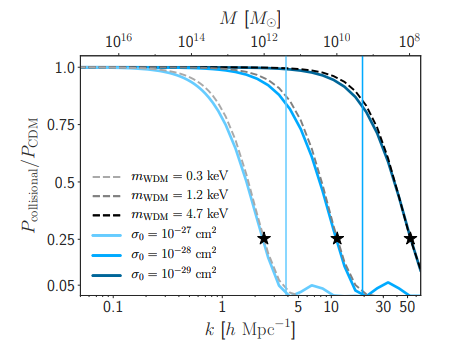

---

### Critical wave number (as a function of σ0)

Rate of momentum transfer equation (Eq. 2)

In [132]:
# As per https://arxiv.org/pdf/1904.10000
# Would like to get into the form Rx(sigma_0) instead of having all of these dependecies on temperature, mass and redshift
def Rx(sigma_0,m_x,T_b,T_x,z):
    return N_0*(1/(1+z))*p_b*(sigma_0/(m_x+m_p))*((T_b/m_p)+(T_x/m_x))**0.5

1. At z_crit, aH = Rx (Eq. 1)
2. Also at z_crit, k_crit = 2*(1/aH)^-1 (Eq. 4)
3. Thus, at z_crit, k_crit = 2*Rx

However, if the goal is to make k a function solely dependant on sigma_0, then we need the values of z_crit, T_x, T_b, and m_x, which I am not sure how to obtain...

Just prior to Eq. 4, we are told that "Solving Equation (3) for zth, accounting for the thermal
evolution of the DM and baryon fluids in Equation (2), and
making appropriate substitutions in Equation (1), we can find
zcrit given the parameters σ0 and mχ that describe our DM–
baryon scattering model" in addition to some information regarding the temperature paremeters, yet still not exactly sure what is meant here..

In [131]:
# As per https://arxiv.org/pdf/1904.10000
# This is not yet functional. Need to figure out how to deal with T_b, T_x, m_x, and z first
def k_crit(Rx, sigma_0):
    return 2*Rx(sigma_0)

Cannot test anything until I know what do to with the temperatures, redshift and DM mass

---

### Other work

This is slightly unrelated, but the following is a reworking of Eq. 6 to solve for σ0 as a function of critical mass and DM mass.

I figured if this would work, I could set Eq. 6 and 5 to each other and solve for the relation between k_crit and σ0. Couple problems with this though. Firstly, the function below is not returning values consistent with Fig. 1. Secondly, Eq. 6 is an approximation, so I'm not sure how much to trust it wrt equivalencies.

In [134]:
# Pas bien
# Issue might be related to unit conversion
# M_crit is returned in solar masses but we pass mass as GeV for m_x -- that being said, the coversion from solar masses to GeV should only make the answer further from the truth (I think)
def sigma_0(M_crit, m_x, k_crit):
    return math.sqrt((M_crit(k_crit)*6*((H_0*math.sqrt(Omega_rad))**5)*m_p)/((math.pi**4)*((N_0*Y_p*Omega_b)**2)*Omega_m*(p_crit**3)*T_0))*m_x

In [141]:
k = 4
print "For k =",k,"-> σ0 =",sigma_0(M_crit, 1, k*h)

For k = 4 -> σ0 = 1.07200002956e-09
